In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dir_data = './data/'

In [4]:
f_app_train = os.path.join(dir_data,"application_train.csv")
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [6]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in app_train:
    if app_train[col].dtype == "object":
        if len(list(app_train[col].unique())) <= 2:
            app_train[col] = le.fit_transform(app_train[col]) #.fit_transform :先进行fit再进行transform
print(app_train.shape)
app_train.sample(n=10)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
172370,299743,0,0,F,0,1,0,202500.0,495000.0,20938.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
119518,238595,0,0,F,1,1,0,135000.0,675000.0,22437.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
144378,267410,0,0,F,0,1,0,112500.0,265500.0,13878.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
146433,269788,0,0,M,1,1,1,202500.0,1165153.5,46336.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
167456,294120,0,0,F,0,1,0,157500.0,679500.0,19998.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
181785,310703,0,0,F,0,0,0,76500.0,454500.0,14661.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
70702,182011,0,1,M,0,1,0,135000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
255103,395182,0,0,F,0,1,0,63000.0,142200.0,5490.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
39357,145578,0,0,F,0,0,0,112500.0,225000.0,9661.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
251176,390632,0,0,F,0,0,0,225000.0,1204047.0,67230.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train["DAYS_EMPLOYED"].replace({365243:np.nan},inplace = True)#inplace = True取代原本那行

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# 相關係數

In [15]:
app_train.corr()["TARGET"]

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


# 作業

作業目標：

請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果

思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)

思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?


In [22]:
TARGET_CORR_SORT = app_train.corr()["TARGET"].sort_values(ascending = False)

In [23]:
TARGET_CORR_SORT

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


In [25]:
TARGET_CORR_SORT.iloc[0:15]

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

In [33]:
TARGET_CORR_SORT.iloc[95:110]

LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED_ANOM           -0.045987
DAYS_BIRTH                   -0.078239
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

參考別人作法:

In [36]:
TARGET_CORR_SORT_mix = pd.concat([TARGET_CORR_SORT.head(15),TARGET_CORR_SORT.tail(15)])
TARGET_CORR_SORT_mix

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
LIVINGAREA_AVG                -0.032997
FLOORSMIN_MEDI                -0.033394
FLOORSMIN_AVG                 -0.033614
ELEVATORS_MEDI                -0.033863
ELEVATORS_AVG                 -0.034199
REGION_POPULATION_RELATIVE    -0.037227
AMT_GOODS_PRICE               -0.039645
FLOORSMAX_MODE                -0.043226
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_AVG                 -0.044003


In [37]:
sub_df = app_train[app_train["DAYS_EMPLOYED"].notnull()]

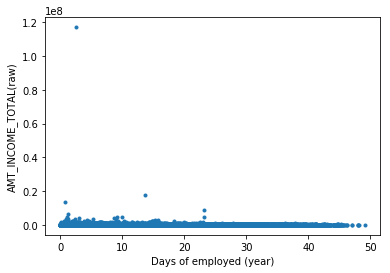

Correlation 0.0130


In [38]:
plt.plot(sub_df["DAYS_EMPLOYED"]/(-365),sub_df["AMT_INCOME_TOTAL"],".")
plt.xlabel("Days of employed (year)")
plt.ylabel("AMT_INCOME_TOTAL(raw)")
plt.show()
corr = np.corrcoef(sub_df["DAYS_EMPLOYED"]/(-365),sub_df["AMT_INCOME_TOTAL"])
print("Correlation %.4f"%corr[0][1])

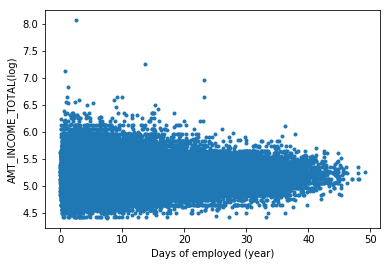

Correlation 0.0380


In [41]:
# 通常可以對數值範圍較大的取 log
#發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df["DAYS_EMPLOYED"]/(-365),np.log10(sub_df["AMT_INCOME_TOTAL"]),".")
plt.xlabel("Days of employed (year)")
plt.ylabel("AMT_INCOME_TOTAL(log)")
plt.show()
corr = np.corrcoef(sub_df["DAYS_EMPLOYED"]/(-365),np.log10(sub_df["AMT_INCOME_TOTAL"]))
print("Correlation %.4f"%corr[0][1])

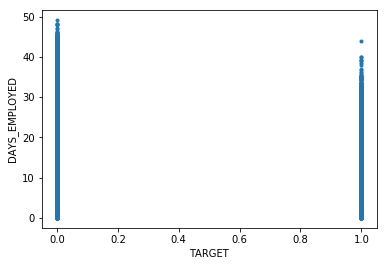

Correlation -0.0750


In [46]:
plt.plot(sub_df["TARGET"],sub_df["DAYS_EMPLOYED"]/(-365),".")
plt.xlabel("TARGET")
plt.ylabel("DAYS_EMPLOYED")
plt.show()
corr = np.corrcoef(sub_df["TARGET"],sub_df["DAYS_EMPLOYED"]/(-365))
print("Correlation %.4f"%corr[0][1])

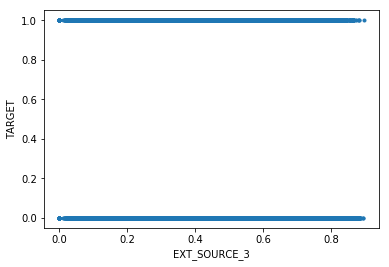

Correlation nan


In [47]:
plt.plot(app_train["EXT_SOURCE_3"],app_train["TARGET"],".")
plt.xlabel("EXT_SOURCE_3")
plt.ylabel("TARGET")
plt.show()
corr = np.corrcoef(app_train["EXT_SOURCE_3"],app_train["TARGET"])
print("Correlation %.4f"%corr[0][1])